## KNN을 이용한 이상치 탐색
 - Simple detection example

In [2]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
#예제 데이터
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
query_point = np.array([[2, 3]])

In [4]:
#모델 생성
knn = NearestNeighbors(n_neighbors=3)
knn.fit(data)

NearestNeighbors(n_neighbors=3)

In [5]:
#kneighbors 호출

distances, indices = knn.kneighbors(query_point)

In [6]:
indices

array([[0, 1, 2]])

In [7]:
distances

array([[1.41421356, 1.41421356, 4.24264069]])

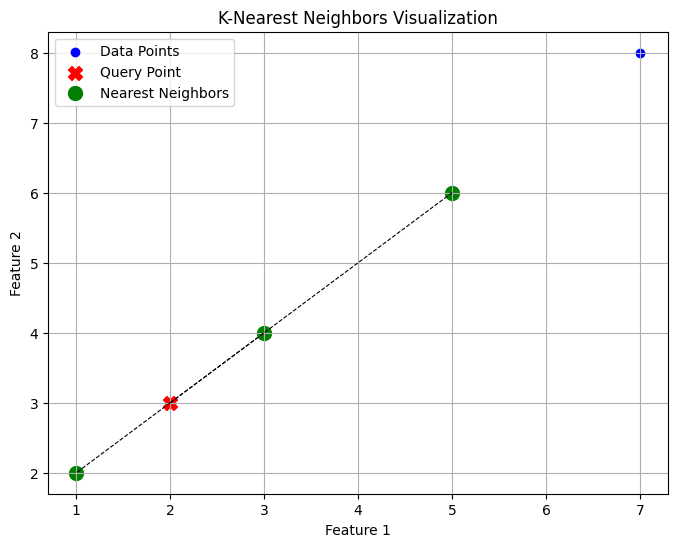

In [8]:
#시각화

import matplotlib.pyplot as plt
# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')
# 쿼리 포인트
plt.scatter(query_point[:, 0], query_point[:, 1], color='red', label='Query Point', marker='X', s=100)
# 가장 가까운 이웃들
plt.scatter(data[indices][0][:, 0], data[indices][0][:, 1], color='green', label='Nearest Neighbors', marker='o', s=100)

# 거리 선 연결
for i in range(len(indices[0])):
    plt.plot([query_point[0][0], data[indices[0][i]][0]], [query_point[0][1], data[indices[0][i]][1]], 'k--', linewidth=0.8)

plt.legend()
plt.title('K-Nearest Neighbors Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## KNN 모델 생성과 학습

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

In [11]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
df = pd.DataFrame(data=breast_cancer_data["data"], columns=breast_cancer_data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [14]:
# 거리를 기반으로 데이터를 탐색하고 학습하는 알고리즘들은 무조건 scaling을 해야한다.
# 종속변수(Y)는 절대로 scaling을 수행하지 않는다.
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [16]:
label_df = pd.DataFrame(data=breast_cancer_data["target"], columns=["label"])
label_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df, label_df, test_size=0.2, random_state=27)
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [18]:
#모델생성

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

c:\Users\Admin\anaconda3\envs\ML_test\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.score(x_test, y_test)

0.9736842105263158

## KNN Anomaly Detection

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

In [23]:
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
scaled_df = df.copy()

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaled_df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [26]:
# Anomaly Detection(이상치 탐색)

cols = ["sepal length (cm)", "sepal width (cm)"]
scaled_partial_df = scaled_df.loc[:, cols]
scaled_partial_df.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


In [27]:
X = scaled_partial_df.values
y = iris["target"]

In [28]:
# 모델 생성 / 학습

knn_detect = KNeighborsClassifier(n_neighbors=3)
knn_detect.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
distance, indexed = knn_detect.kneighbors(X)

In [30]:
scaled_partial_df.head(2)

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667


In [31]:
indexed

array([[  0,  17,  40],
       [  1,  25,  12],
       [  2,  29,  47],
       [  3,  47,   2],
       [  4,  37,  40],
       [ 16,   5,  10],
       [  6,  24,  11],
       [ 26,   7,  39],
       [  8,  38,  13],
       [  9,  34,  30],
       [ 10,  48,   5],
       [ 11,  24,   6],
       [ 12,  45,   1],
       [ 13,  38,   8],
       [ 14,  18,  33],
       [ 15,  33,  14],
       [ 16,   5,  10],
       [  0,  17,  40],
       [ 18,  14,  10],
       [ 44,  19,  46],
       [ 20,  31,  36],
       [ 21,  46,  19],
       [ 22,  37,   6],
       [ 23,  49,  39],
       [ 11,  24,   6],
       [ 25,   1,   9],
       [ 26,   7,  39],
       [ 27,  17,   0],
       [ 28,  39,  27],
       [  2,  29,  47],
       [ 30,  34,   9],
       [ 20,  31,  36],
       [ 32,  33,   5],
       [ 33,  32,  15],
       [  9,  34,  30],
       [ 35,  49,  23],
       [ 36,  31,  20],
       [ 37,   4,  40],
       [ 38,  13,   8],
       [ 39,   7,  26],
       [ 40,  43,   0],
       [ 41,  57

In [32]:
distance

array([[0.        , 0.        , 0.02777778],
       [0.        , 0.02777778, 0.02777778],
       [0.        , 0.        , 0.02777778],
       [0.        , 0.04166667, 0.0500771 ],
       [0.        , 0.02777778, 0.04166667],
       [0.        , 0.        , 0.08333333],
       [0.        , 0.05555556, 0.05555556],
       [0.        , 0.        , 0.02777778],
       [0.        , 0.04166667, 0.0500771 ],
       [0.        , 0.        , 0.02777778],
       [0.        , 0.02777778, 0.08333333],
       [0.        , 0.        , 0.05555556],
       [0.        , 0.        , 0.02777778],
       [0.        , 0.02777778, 0.0500771 ],
       [0.        , 0.08784105, 0.11785113],
       [0.        , 0.1001542 , 0.16896563],
       [0.        , 0.        , 0.08333333],
       [0.        , 0.        , 0.02777778],
       [0.        , 0.08784105, 0.0931695 ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0500771 ],
       [0.        , 0.04166667, 0.04166667],
       [0.

In [34]:
means = distance.mean(axis=1)
means

array([0.00925926, 0.01851852, 0.00925926, 0.03058126, 0.02314815,
       0.02777778, 0.03703704, 0.00925926, 0.03058126, 0.00925926,
       0.03703704, 0.01851852, 0.00925926, 0.02595163, 0.06856406,
       0.08970661, 0.02777778, 0.00925926, 0.06033685, 0.        ,
       0.01669237, 0.02777778, 0.05555556, 0.02314815, 0.01851852,
       0.02595163, 0.00925926, 0.01851852, 0.02314815, 0.00925926,
       0.01851852, 0.01669237, 0.06444123, 0.06444123, 0.00925926,
       0.03058126, 0.03338473, 0.02595163, 0.02314815, 0.01851852,
       0.00925926, 0.08585187, 0.04166667, 0.00925926, 0.        ,
       0.00925926, 0.        , 0.01851852, 0.02777778, 0.02314815,
       0.02595163, 0.00925926, 0.        , 0.02777778, 0.01851852,
       0.00925926, 0.01388889, 0.03058126, 0.03058126, 0.06033685,
       0.09798854, 0.00925926, 0.01851852, 0.01851852, 0.02314815,
       0.        , 0.00925926, 0.        , 0.03521089, 0.01851852,
       0.05555556, 0.00925926, 0.02314815, 0.00925926, 0.02314

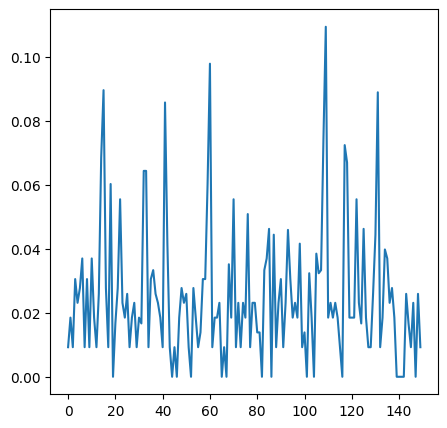

In [35]:
plt.figure(figsize=(5,5))
plt.plot(means)
plt.show()

In [36]:
#위의 means에서 0.06 (thresholad of outlier)
#np.where(condition)만 쓰는 경우, 리턴값 : 해당 조건을 만족하는 index를 리턴
outlier_idx = np.where(means > 0.06)
outlier_idx

(array([ 14,  15,  18,  32,  33,  41,  59,  60, 108, 109, 117, 118, 131]),)

In [37]:
outlier_df = df.loc[outlier_idx]
outlier_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
18,5.7,3.8,1.7,0.3
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
41,4.5,2.3,1.3,0.3
59,5.2,2.7,3.9,1.4
60,5.0,2.0,3.5,1.0
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5


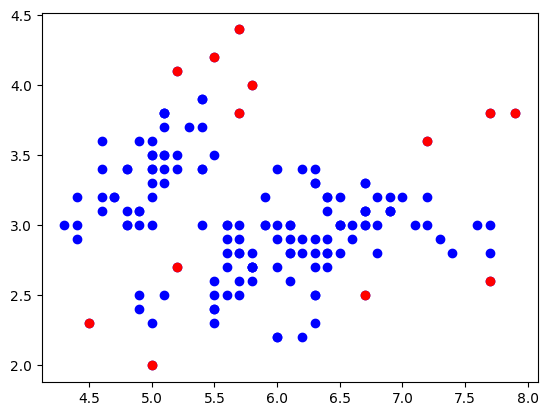

In [38]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], color="b")
#outlier detection 결과
plt.scatter(outlier_df["sepal length (cm)"], outlier_df["sepal width (cm)"], color="r")